In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Quality of Service 5G.csv')

In [3]:
df

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,9/3/2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,9/3/2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,9/3/2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,9/3/2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%
...,...,...,...,...,...,...,...,...
395,9/3/2023 10:06,User_396,Streaming,-110 dBm,61 ms,1.3 Mbps,1.8 Mbps,85%
396,9/3/2023 10:06,User_397,Video_Call,-40 dBm,53 ms,14.5 Mbps,15.8 Mbps,75%
397,9/3/2023 10:06,User_398,Video_Streaming,-113 dBm,58 ms,1.0 Mbps,1.4 Mbps,70%
398,9/3/2023 10:06,User_399,Emergency_Service,-40 dBm,5 ms,0.4 Mbps,0.4 Mbps,70%


1. Data Pre-Processing :

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            400 non-null    object
 1   User_ID              400 non-null    object
 2   Application_Type     400 non-null    object
 3   Signal_Strength      400 non-null    object
 4   Latency              400 non-null    object
 5   Required_Bandwidth   400 non-null    object
 6   Allocated_Bandwidth  400 non-null    object
 7   Resource_Allocation  400 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB


In [5]:
df.isna().sum()

Timestamp              0
User_ID                0
Application_Type       0
Signal_Strength        0
Latency                0
Required_Bandwidth     0
Allocated_Bandwidth    0
Resource_Allocation    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['Application_Type'].unique()

array(['Video_Call', 'Voice_Call', 'Streaming', 'Emergency_Service',
       'Online_Gaming', 'Background_Download', 'Web_Browsing',
       'IoT_Temperature', 'Video_Streaming', 'File_Download', 'VoIP_Call'],
      dtype=object)

df['Application_Type']

Contains the following unique values: ['Video_Call', 'Voice_Call', 'Streaming', 'Emergency_Service', 'Online_Gaming', 'Background_Download', 'Web_Browsing', 'IoT_Temperature', 'Video_Streaming', 'File_Download', 'VoIP_Call']

These all categories can be arranged in increasing Ordered form of Resource requirement:

## IoT_Temperature
## Web_Browsing
## VoIP_Call
## Video_Call
## File_Download
## Background_Download
## Streaming
## Video_Streaming
## Online_Gaming
## Emergency_Service

In [8]:
from sklearn.preprocessing import OrdinalEncoder


data = [['IoT_Temperature', 'Web_Browsing', 'VoIP_Call', 'Voice_Call', 'Video_Call', 'File_Download',
    'Background_Download', 'Streaming', 'Video_Streaming', 'Online_Gaming', 'Emergency_Service']]

encoder = OrdinalEncoder(categories=data)

print(df['Application_Type'].unique())
df['Application_Type'] = encoder.fit_transform(np.array(df['Application_Type']).reshape(-1,1))
print(df['Application_Type'].unique())

['Video_Call' 'Voice_Call' 'Streaming' 'Emergency_Service' 'Online_Gaming'
 'Background_Download' 'Web_Browsing' 'IoT_Temperature' 'Video_Streaming'
 'File_Download' 'VoIP_Call']
[ 4.  3.  7. 10.  9.  6.  1.  0.  8.  5.  2.]


In [9]:
df['Resource_Allocation'] = df['Resource_Allocation'].str.replace('%','').astype('int')

In [10]:
df['User_ID'] = df['User_ID'].str.replace('User_','').astype('int')

In [11]:
def mbps_to_kbps(value):  
    if 'Mbps' in value:
        n = float(value.replace(' Mbps',''))
        return str(n*1000)+' Kbps'
    else:
        return value


df['Required_Bandwidth'] = df['Required_Bandwidth'].map(mbps_to_kbps)
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].map(mbps_to_kbps)

# Bandwidth contains 2 units : Kbps and Mbps, where Kbps=1000*Mbps
# Mbps : Convert to Kbps
# Kbps : Leave as it is

In [12]:
df['Required_Bandwidth'] = df['Required_Bandwidth'].str.replace(' Kbps','').astype('float')
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].str.replace(' Kbps','').astype('float')

In [13]:
df['Latency'] = df['Latency'].str.replace(' ms','').astype('int')

In [14]:
df['Signal_Strength'] = df['Signal_Strength'].str.replace(' dBm','').astype('int')

In [15]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            400 non-null    datetime64[ns]
 1   User_ID              400 non-null    int32         
 2   Application_Type     400 non-null    float64       
 3   Signal_Strength      400 non-null    int32         
 4   Latency              400 non-null    int32         
 5   Required_Bandwidth   400 non-null    float64       
 6   Allocated_Bandwidth  400 non-null    float64       
 7   Resource_Allocation  400 non-null    int32         
dtypes: datetime64[ns](1), float64(3), int32(4)
memory usage: 18.9 KB


In [17]:
df.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,2023-09-03 10:00:00,1,4.0,-75,30,10000.0,15000.0,70
1,2023-09-03 10:00:00,2,3.0,-80,20,100.0,120.0,80
2,2023-09-03 10:00:00,3,7.0,-85,40,5000.0,6000.0,75
3,2023-09-03 10:00:00,4,10.0,-70,10,1000.0,1500.0,90
4,2023-09-03 10:00:00,5,9.0,-78,25,2000.0,3000.0,85


In [18]:
df.tail()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
395,2023-09-03 10:06:00,396,7.0,-110,61,1300.0,1800.0,85
396,2023-09-03 10:06:00,397,4.0,-40,53,14500.0,15800.0,75
397,2023-09-03 10:06:00,398,8.0,-113,58,1000.0,1400.0,70
398,2023-09-03 10:06:00,399,10.0,-40,5,400.0,400.0,70
399,2023-09-03 10:06:00,400,1.0,-113,0,100.0,100.0,70


In [19]:
df.describe()

,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000
mean,200.500000,5.605000,-80.495000,33.825000,3135.512500,3502.38000,74.712500
std,115.614301,3.156562,20.701119,21.122139,3984.096715,4460.80117,8.982291
min,1.000000,0.000000,-123.000000,0.000000,0.000000,0.00000,50.000000
25%,100.750000,2.000000,-98.000000,21.750000,417.500000,417.50000,70.000000
50%,200.500000,6.000000,-83.000000,31.000000,1200.000000,1350.00000,70.000000
75%,300.250000,8.000000,-64.000000,45.000000,4100.000000,4425.00000,80.000000
max,400.000000,10.000000,-40.000000,110.000000,14500.000000,15800.00000,90.000000


In [20]:
df.drop('User_ID', axis=1, inplace=True)
df

,Timestamp,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,2023-09-03 10:00:00,4.0,-75,30,10000.0,15000.0,70
1,2023-09-03 10:00:00,3.0,-80,20,100.0,120.0,80
2,2023-09-03 10:00:00,7.0,-85,40,5000.0,6000.0,75
3,2023-09-03 10:00:00,10.0,-70,10,1000.0,1500.0,90
4,2023-09-03 10:00:00,9.0,-78,25,2000.0,3000.0,85
...,...,...,...,...,...,...,...
395,2023-09-03 10:06:00,7.0,-110,61,1300.0,1800.0,85
396,2023-09-03 10:06:00,4.0,-40,53,14500.0,15800.0,75
397,2023-09-03 10:06:00,8.0,-113,58,1000.0,1400.0,70
398,2023-09-03 10:06:00,10.0,-40,5,400.0,400.0,70


Data Visualization :

<AxesSubplot:xlabel='Resource_Allocation', ylabel='count'>

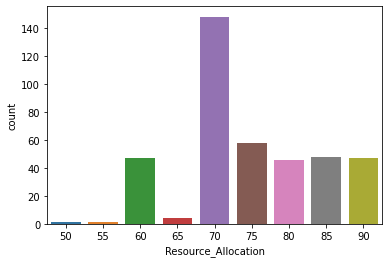

In [21]:
sns.countplot(x=df['Resource_Allocation'])

<AxesSubplot:>

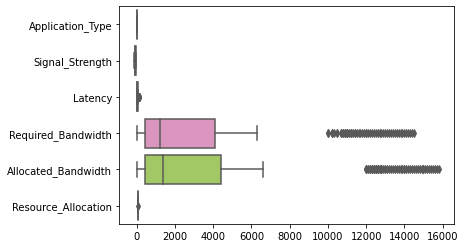

In [22]:
sns.boxplot(data=df, orient="h", palette="Set2")  # Use sns.violinplot() for a violin plot<Axes:>

<AxesSubplot:>

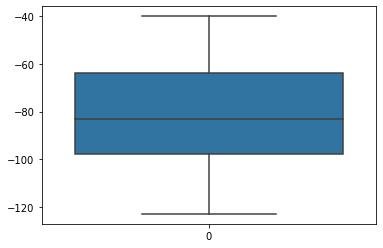

In [23]:
sns.boxplot(data=df['Signal_Strength'])

<AxesSubplot:>

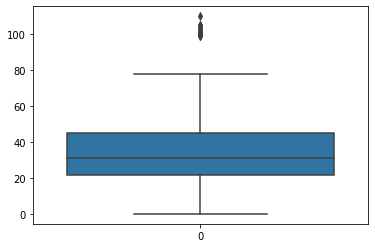

In [24]:
sns.boxplot(data=df['Latency']) 

In [25]:
Q1 = np.percentile(df['Latency'], 25, method='midpoint')
Q3 = np.percentile(df['Latency'], 75, method='midpoint')

IQR = Q3-Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

upper_val = np.where(df['Latency'] >= upper)
lower_val = np.where(df['Latency'] <= lower)

# Removing the outliers
df.drop(upper_val[0], inplace=True)
df.drop(lower_val[0], inplace=True)

<AxesSubplot:>

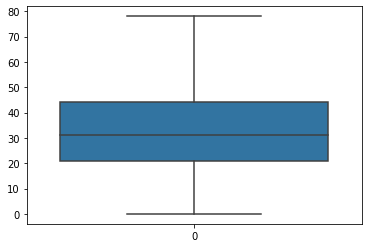

In [26]:
sns.boxplot(data=df['Latency'])

In [27]:
df.shape

(387, 7)

<AxesSubplot:>

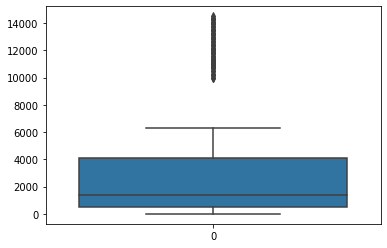

In [28]:
sns.boxplot(data=df['Required_Bandwidth']) 

<AxesSubplot:>

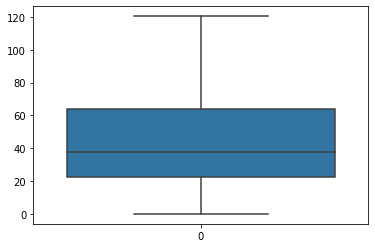

In [29]:
df['Required_Bandwidth'] = np.sqrt(df['Required_Bandwidth'])

sns.boxplot(data=df['Required_Bandwidth'])

<AxesSubplot:>

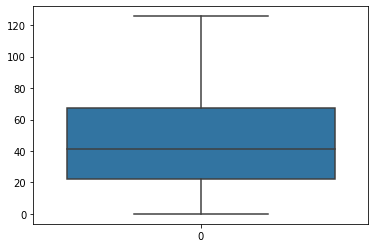

In [30]:
df['Allocated_Bandwidth'] = np.sqrt(df['Allocated_Bandwidth'])

sns.boxplot(data=df['Allocated_Bandwidth']) 

<AxesSubplot:>

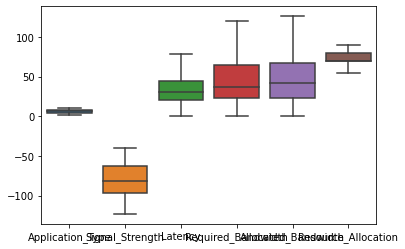

In [31]:
sns.boxplot(data=df)

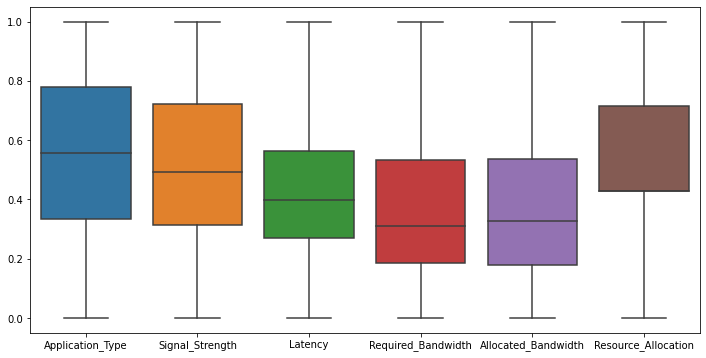

In [32]:
def min_max_scaling(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

Transformed_df = df

Transformed_df['Signal_Strength'] = min_max_scaling(df['Signal_Strength'])
Transformed_df['Latency'] = min_max_scaling(df['Latency'])
Transformed_df['Required_Bandwidth'] = min_max_scaling(df['Required_Bandwidth'])
Transformed_df['Allocated_Bandwidth'] = min_max_scaling(df['Allocated_Bandwidth'])
Transformed_df['Resource_Allocation'] = min_max_scaling(df['Resource_Allocation'])
Transformed_df['Application_Type'] = min_max_scaling(df['Application_Type'])

Transformed_df.drop('Timestamp', axis=1, inplace=True)

plt.figure(figsize=(12,6))
sns.boxplot(data=Transformed_df)
plt.show()

In [33]:
Transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 399
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Application_Type     387 non-null    float64
 1   Signal_Strength      387 non-null    float64
 2   Latency              387 non-null    float64
 3   Required_Bandwidth   387 non-null    float64
 4   Allocated_Bandwidth  387 non-null    float64
 5   Resource_Allocation  387 non-null    float64
dtypes: float64(6)
memory usage: 29.3 KB


In [34]:
Transformed_df.describe()

,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,0.532587,0.520096,0.404227,0.386077,0.390511,0.567368
std,0.337124,0.249585,0.221440,0.273194,0.277136,0.257148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.313253,0.269231,0.185695,0.177892,0.428571
50%,0.555556,0.493976,0.397436,0.310728,0.328017,0.428571
75%,0.777778,0.722892,0.564103,0.531751,0.536625,0.714286
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Split the DataFrame :

In [35]:
X = Transformed_df.drop('Resource_Allocation', axis=1)
Y = Transformed_df['Resource_Allocation']

In [36]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [37]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((309, 5), (78, 5), (309,), (78,))

## Linear Regression Model :

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lin_regressor = LinearRegression()
lin_regressor.fit(x_train,y_train)

LinearRegression()

Predict Test Set Results :

In [40]:
lin_regressor_y_pred = lin_regressor.predict(x_test)

Evaluation of Model Performance :

In [42]:
from sklearn.metrics import r2_score, mean_squared_error

In [43]:
lin_regressor_r2 = r2_score(y_test, lin_regressor_y_pred)
lin_regressor_r2

-0.04872014161021232

In [44]:
lin_regressor_mse = mean_squared_error(y_test, lin_regressor_y_pred)
lin_regressor_mse

0.07650919226032989

In [45]:
lin_regressor_rmse = np.sqrt(lin_regressor_mse)
lin_regressor_rmse

0.27660295056331174

## Visualize the Results of the Prediction :

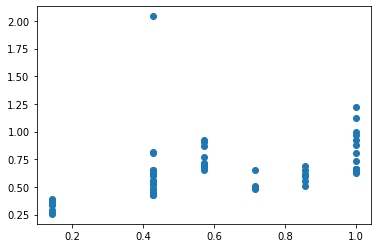

In [46]:
plt.scatter(y_test, lin_regressor_y_pred)
plt.show()

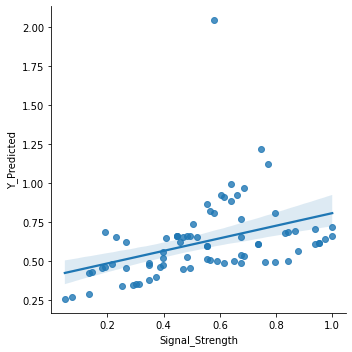

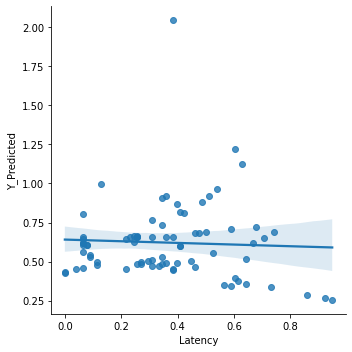

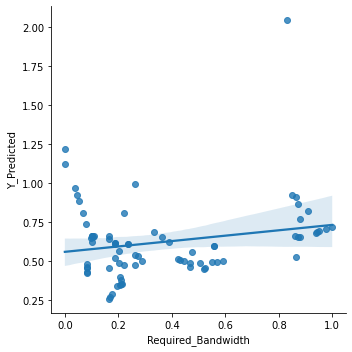

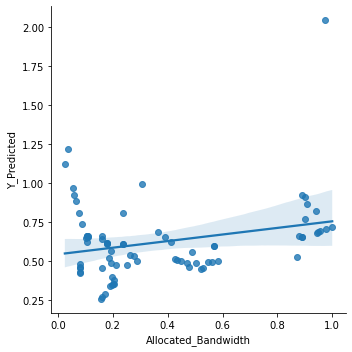

In [47]:
lin_regressor_plot = x_test
lin_regressor_plot['Y_Predicted'] = lin_regressor_y_pred

sns.lmplot(x='Signal_Strength', y='Y_Predicted', data=lin_regressor_plot)

sns.lmplot(x='Latency', y='Y_Predicted', data=lin_regressor_plot)

sns.lmplot(x='Required_Bandwidth', y='Y_Predicted', data=lin_regressor_plot)

sns.lmplot(x='Allocated_Bandwidth', y='Y_Predicted', data=lin_regressor_plot)

plt.show()

## SVM Regression Model :

In [48]:
from sklearn.svm import SVR

In [49]:
svr = SVR(kernel='poly')
svr.fit(x_train, y_train)

SVR(kernel='poly')

In [50]:
x_test.drop('Y_Predicted', axis=1, inplace=True)

In [51]:
svr_y_pred = svr.predict(x_test)

Evaluation of Model Performance :

In [52]:
svr_r2 = r2_score(y_test, svr_y_pred)
svr_r2

0.5166550618405741

In [53]:
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_mse

0.035262344389530756

In [54]:
svr_rmse = np.sqrt(svr_mse)
svr_rmse

0.1877827052460656

Visualize the Results of the Prediction :

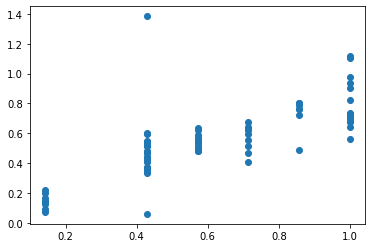

In [55]:
plt.scatter(y_test, svr_y_pred)
plt.show()

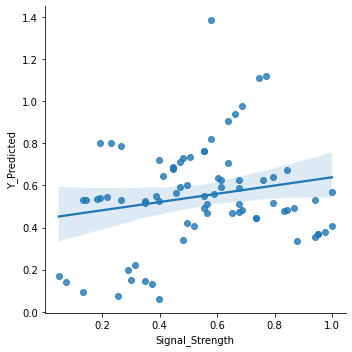

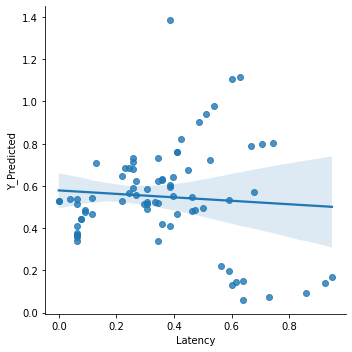

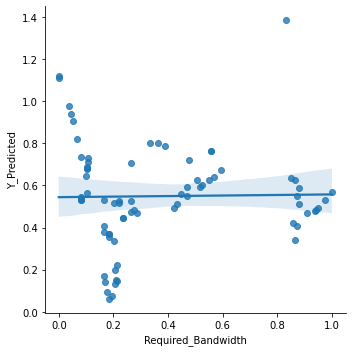

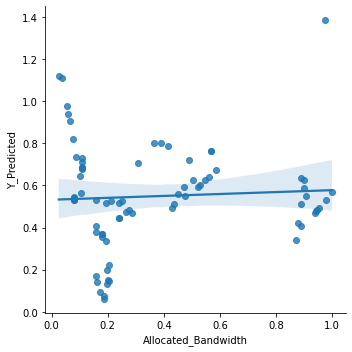

In [56]:
lin_regressor_plot = x_test
lin_regressor_plot['Y_Predicted'] = svr_y_pred

sns.lmplot(x='Signal_Strength', y='Y_Predicted', data=lin_regressor_plot)

sns.lmplot(x='Latency', y='Y_Predicted', data=lin_regressor_plot)

sns.lmplot(x='Required_Bandwidth', y='Y_Predicted', data=lin_regressor_plot)

sns.lmplot(x='Allocated_Bandwidth', y='Y_Predicted', data=lin_regressor_plot)

plt.tight_layout()
plt.show()

## KNN Regression Model

In [57]:
from sklearn.neighbors import KNeighborsRegressor

In [58]:
knn_regr = KNeighborsRegressor(n_neighbors=5)
knn_regr.fit(x_train, y_train)

KNeighborsRegressor()

Predict Test Set Results :

In [59]:
x_test.drop('Y_Predicted', axis=1, inplace=True)

In [60]:
knn_y_pred = svr.predict(x_test)

Evaluation of Model Performance :

In [61]:
knn_r2 = r2_score(y_test, knn_y_pred)
knn_r2

0.5166550618405741

In [62]:
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_mse

0.035262344389530756

In [63]:
knn_rmse = np.sqrt(knn_mse)
knn_rmse

0.1877827052460656

Visualize the Results of the Prediction :

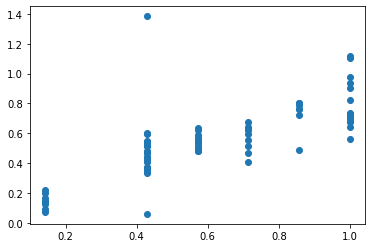

In [64]:
plt.scatter(y_test, knn_y_pred)
plt.show()

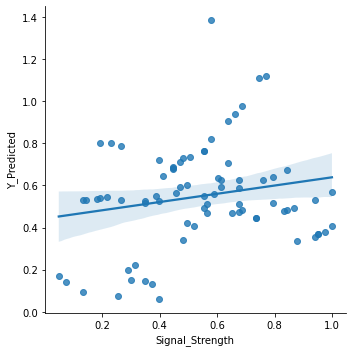

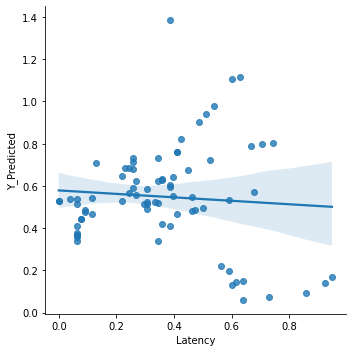

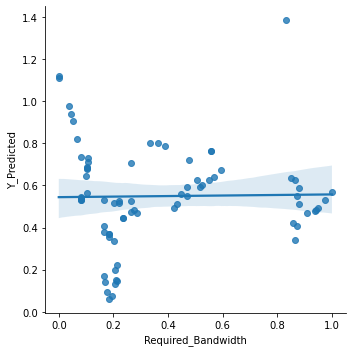

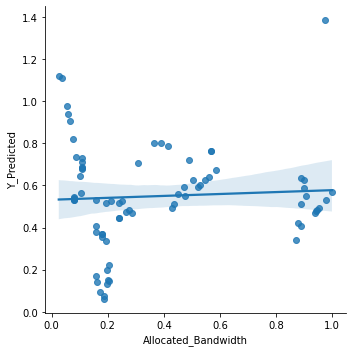

In [65]:
lin_regressor_plot = x_test
lin_regressor_plot['Y_Predicted'] = knn_y_pred

sns.lmplot(x='Signal_Strength', y='Y_Predicted', data=lin_regressor_plot)

sns.lmplot(x='Latency', y='Y_Predicted', data=lin_regressor_plot)

sns.lmplot(x='Required_Bandwidth', y='Y_Predicted', data=lin_regressor_plot)

sns.lmplot(x='Allocated_Bandwidth', y='Y_Predicted', data=lin_regressor_plot)

plt.tight_layout()
plt.show()

## Comparing Results of MLR, SVM and KNN Regression Models :

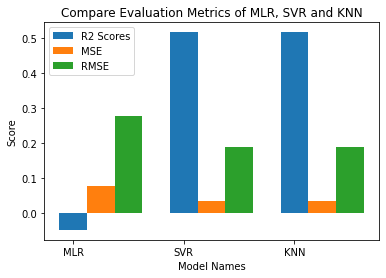

In [66]:
categories = ['MLR', 'SVR', 'KNN']
x = np.arange(len(categories))
r2_scores = [lin_regressor_r2, svr_r2, knn_r2]
mse_scores = [lin_regressor_mse, svr_mse, knn_mse]
rmse_scores = [lin_regressor_rmse, svr_rmse, knn_rmse]

width = 0.25
fig, ax = plt.subplots()

ax.bar(x, r2_scores, label='R2 Scores', width=0.25)
ax.bar(x+width, mse_scores, label='MSE', width=0.25)
ax.bar(x+2*width, rmse_scores, label='RMSE', width=0.25)

plt.xlabel('Model Names')
plt.ylabel('Score')
plt.title('Compare Evaluation Metrics of MLR, SVR and KNN')
plt.legend()  
ax.set_xticks(x)
ax.set_xticklabels(categories)

plt.show()

## Thus, we can conclude that, SVR and KNN Regressor has similar performance.
## Which is better than MLR(Multliple Linear Regression)

Output : Resource Allocation -> Indenependent var -> Signal , latency , Required band , Allocated band . Resource predict :Resourec down. Complex Relation  4 var -> Effectively optimize . Preicted rsc effect -> On every four para. 